## **``MANOVA``**
#### **It is an extension of ANOVA and here 'M' stands for Multivariate. Just like ANOVA it can be 1-Way or 2-Way. Both MANOVA and MANCOVA can have 2 or more continuous dependent or response variables.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.datasets as skd
import pingouin
import scikit_posthocs
import scipy.stats as sci_st
import statsmodels.api as sm_api
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [11]:
boston_data = skd.load_boston()

In [12]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [41]:
boston_df = pd.concat([pd.DataFrame(boston_data.data,columns=boston_data.feature_names),
                       pd.DataFrame(boston_data.target,columns=['Label'])],
                      axis=1)

boston_df = boston_df[boston_df['RAD'] <= 4.0]

In [42]:
boston_df.shape

(192, 14)

### **``1-Way MANOVA``**

In [43]:
manova_1_way_formula = ('Label + CRIM ~ RAD')

In [44]:
manova_1_way = MANOVA.from_formula(manova_1_way_formula,data=boston_df)

In [45]:
print(manova_1_way.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.4118 2.0000 189.0000 134.9634 0.0000
         Pillai's trace 0.5882 2.0000 189.0000 134.9634 0.0000
 Hotelling-Lawley trace 1.4282 2.0000 189.0000 134.9634 0.0000
    Roy's greatest root 1.4282 2.0000 189.0000 134.9634 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
           RAD           Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.8552 2.0000 189.0000 15.9953 0.0000
          Pillai's trace 0.1448 2.0000 189.0000 15.9953 0.0000
  Hotelling

### **Here, we have performed MANOVA for 2 response variables House Rate and Crime Rate with one factor or categorical variable i.e. Highways Accessibility.**

### **In the result, it is quite evident that there is a significant difference in means of Highways Accessibility groups for the combination of House and Crime Rates. We will use Wilk's Lambda which assumes that the homogenity of variances exist in the dataset (I'm assuming this assumption holds TRUE here). Now, we will perform the univariate analysis to identify how much difference in means exists in both the dependent variables.**

### **``Uni-variate Analysis for Dependent Variable 1 : House Rate ``**

In [46]:
reg_res_val1 = ols('Label ~ RAD',data=boston_df).fit()

In [50]:
sm_api.stats.anova_lm(reg_res_val1,typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
RAD,1.0,620.716217,620.716217,10.361464,0.001513
Residual,190.0,11382.182950,59.906226,NaN,NaN


### **Now, we have two dependent variables so the level of significance will be re-calculated as 0.025(i.e. 0.05/2). If we don't perform the re-calculation of alpha then we will end up with more number of Type-1 Errors.**

### **So, the univariate test for dependent variable 1 is also significant. Therefore, we will go ahead and perform the pair wise comparison test to identify which groups of Highway Accessibility have significant difference in means.** 

In [48]:
reg_res_val1_post_hocs = pairwise_tukeyhsd(endog=boston_df['Label'],groups=boston_df['RAD'],alpha=0.025)

In [49]:
reg_res_val1_post_hocs.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1.0,2.0,2.4683,0.6734,-3.973,8.9097,False
1.0,3.0,3.5639,0.3127,-2.3133,9.4412,False
1.0,4.0,-2.9777,0.3595,-8.1494,2.1939,False
2.0,3.0,1.0956,0.9,-4.4515,6.6427,False
2.0,4.0,-5.4461,0.0078,-10.2392,-0.6529,True
3.0,4.0,-6.5417,0.001,-10.5449,-2.5384,True


c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


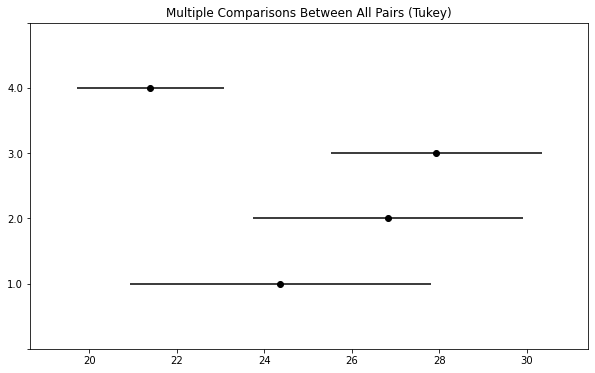

In [51]:
reg_res_val1_post_hocs.plot_simultaneous();

### **Here, we found out that groups (2 & 4) and (3 & 4) are significant difference in house rates.**

### **``Uni-variate Analysis for Dependent Variable 2 : Crime Rate ``**

In [52]:
reg_res_val2 = ols('CRIM ~ RAD',data=boston_df).fit()

In [53]:
sm_api.stats.anova_lm(reg_res_val2,typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
RAD,1.0,3.854328,3.854328,30.875438,9.202109e-08
Residual,190.0,23.718603,0.124835,NaN,NaN


### **So, the univariate test for dependent variable 2 is also significant. Therefore, we will go ahead and perform the pair wise comparison test to identify which groups of Highway Accessibility have significant difference in Crime rate.** 

In [54]:
reg_res_val2_post_hocs = pairwise_tukeyhsd(endog=boston_df['CRIM'],groups=boston_df['RAD'],alpha=0.025)

In [55]:
reg_res_val2_post_hocs.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1.0,2.0,0.0473,0.9,-0.2533,0.3478,False
1.0,3.0,0.0613,0.9,-0.2129,0.3356,False
1.0,4.0,0.3579,0.001,0.1165,0.5992,True
2.0,3.0,0.0141,0.9,-0.2448,0.2729,False
2.0,4.0,0.3106,0.001,0.087,0.5343,True
3.0,4.0,0.2965,0.001,0.1097,0.4833,True


c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


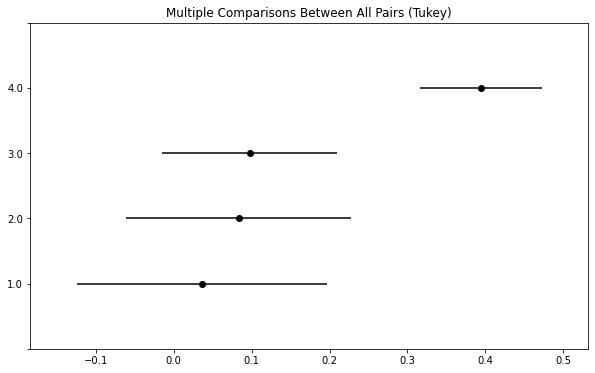

In [56]:
reg_res_val2_post_hocs.plot_simultaneous();

### **Here, we found out that groups (1 & 4), (2 & 4) and (3 & 4) are significant difference in crime rates.**

### **``2-Way MANOVA``**

In [57]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Label
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [58]:
manova_2_way_formula = ('Label + CRIM ~ RAD + CHAS')

In [59]:
manova_2_way = MANOVA.from_formula(manova_2_way_formula,data=boston_df)

In [60]:
print(manova_2_way.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.4062 2.0000 188.0000 137.4338 0.0000
         Pillai's trace 0.5938 2.0000 188.0000 137.4338 0.0000
 Hotelling-Lawley trace 1.4621 2.0000 188.0000 137.4338 0.0000
    Roy's greatest root 1.4621 2.0000 188.0000 137.4338 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
           RAD           Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.8487 2.0000 188.0000 16.7570 0.0000
          Pillai's trace 0.1513 2.0000 188.0000 16.7570 0.0000
  Hotelling

### **Here, I'll use the Wilk's lambda, thus, assumes that homogenity in the variables holds TRUE.**

### **Some more background on Wilk's Lambda Value i.e. RAD --> 0.8487 and CHAS -->0.9707. Here, the point to understand is that Wilk's Lambda are the coefficients between 0 and 1. The higher this value the lower is the contribution of this factor. Thus, the contribution of CHAS is less as compared to RAD in the deviation of dependent variables.**

### **The results of second factor (Charles River Bound) are not significant. Therefore, for this variable we will stop here because it means that there is not significant difference among the depedent variables w.r.t to Charles River Bound.**

### **For the first factor (RAD : Highways accessibility) the results are significant. Therefore, we can go ahead with the univariate analysis and post-hoc tests(just like performed in 1-way MANOVA). If in case both of the factor results were significant then we would have performed the univariate analysis of dependent variable with both the factors.**

### **e.g.**
### **(Label ~ RAD + CHAS) and,**                                                                                                          
### **(CRIM ~ RAD + CHAS).**
### **Then, the same way we will check the significance of both the factors and perform comparison test if they are significant.**

## **``ANCOVA``**
#### **It stands for Analysis of Covariance. It is an extension of ANOVA that is referred as ANOVA + Regression. It is used to determine whether or not there is a statistically significant difference between the means of three or more independent groups, after controlling for one or more covariates or confounding variable(an external variable that influences the response variable).**

#### **Example of ANCOVA**
**A teacher wants to know if three different studying techniques have an impact on exam scores, but she wants to account for the current grade that the student already has in the class.**

- She will perform an ANCOVA using the following variables:

- Factor variable: studying technique
- Covariate: current grade
- Response variable: exam score

#### **DATASET-1**

In [230]:
df = pd.DataFrame({'technique': np.repeat(['A', 'B', 'C'], 5),
                   'current_grade': [67, 88, 75, 77, 85,
                                     92, 69, 77, 74, 88, 
                                     96, 91, 88, 82, 80],
                   'exam_score': [77, 89, 72, 74, 69,
                                  78, 88, 93, 94, 90,
                                  85, 81, 83, 88, 79]})
df

,technique,current_grade,exam_score
0,A,67,77
1,A,88,89
2,A,75,72
3,A,77,74
4,A,85,69
5,B,92,78
6,B,69,88
7,B,77,93
8,B,74,94
9,B,88,90


In [231]:
from pingouin import ancova

In [232]:
ancova(data=df, dv='exam_score', covar='current_grade', between='technique')

,Source,SS,DF,F,p-unc,np2
0,technique,390.575130,2,4.809973,0.031556,0.466536
1,current_grade,4.193886,1,0.103296,0.753934,0.009303
2,Residual,446.606114,11,NaN,NaN,NaN


### **From the ANCOVA table we see that the p-value (p-unc = “uncorrected p-value”) for study technique is 0.03155. Since this value is less than 0.05, we can reject the null hypothesis that each of the studying techniques leads to the same average exam score, even after accounting for the student’s current grade in the class.**

#### **DATASET-2**

In [62]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Label
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [63]:
pingouin.ancova(data=boston_df,dv='Label',between='RAD',covar='AGE')

,Source,SS,DF,F,p-unc,np2
0,RAD,1199.526554,3,8.955124,1.423559e-05,0.125618
1,AGE,2141.154605,1,47.954681,6.794349e-11,0.204102
2,Residual,8349.464568,187,NaN,NaN,NaN


### **From the ANCOVA table, we can say that there is the significant effect of Highways accessibility for the house rates. In addition to this, AGE of the property also played a significant role in the deviation of House rates.**

## **``MANCOVA``**

### **Two Factor or Categorical variables with two or more response variables with a Covariate.**

In [68]:
mancova_2_way_formula = ('Label + CRIM ~ RAD + CHAS + AGE')

In [73]:
print(MANOVA.from_formula(formula=mancova_2_way_formula, data=boston_df).mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.3406 2.0000 187.0000 181.0278 0.0000
         Pillai's trace 0.6594 2.0000 187.0000 181.0278 0.0000
 Hotelling-Lawley trace 1.9361 2.0000 187.0000 181.0278 0.0000
    Roy's greatest root 1.9361 2.0000 187.0000 181.0278 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
           RAD           Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.8550 2.0000 187.0000 15.8507 0.0000
          Pillai's trace 0.1450 2.0000 187.0000 15.8507 0.0000
  Hotelling

### **All the results are significant, therefore, will perform the univariate analysis.**

#### **Univariate Analysis of Dependent Variable-1**

In [74]:
mancova_2_way_val1 = ols('Label ~ RAD + CHAS + AGE',data=boston_df).fit()

In [75]:
sm_api.stats.anova_lm(mancova_2_way_val1)

,df,sum_sq,mean_sq,F,PR(>F)
RAD,1.0,620.716217,620.716217,13.163748,3.676702e-04
CHAS,1.0,324.828139,324.828139,6.888745,9.387280e-03
AGE,1.0,2192.504690,2192.504690,46.497219,1.215439e-10
Residual,188.0,8864.850121,47.153458,NaN,NaN


### **All factors significant results therefore, will perform the post-hoc comparisons for both the factors.**

In [81]:
pairwise_tukeyhsd(endog=boston_df['Label'],groups=boston_df['RAD']).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1.0,2.0,2.4683,0.6734,-3.3946,8.3312,False
1.0,3.0,3.5639,0.3127,-1.7856,8.9135,False
1.0,4.0,-2.9777,0.3595,-7.685,1.7295,False
2.0,3.0,1.0956,0.9,-3.9534,6.1446,False
2.0,4.0,-5.4461,0.0078,-9.8088,-1.0833,True
3.0,4.0,-6.5417,0.001,-10.1854,-2.8979,True


c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


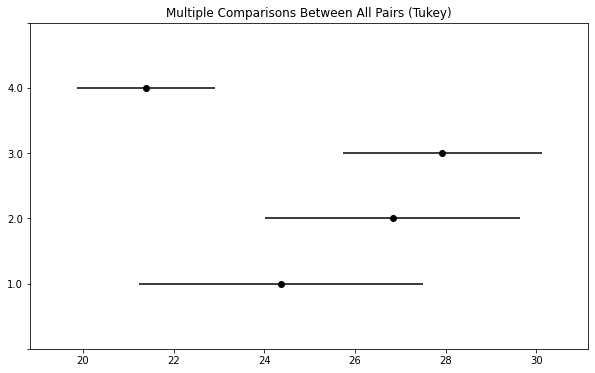

In [86]:
pairwise_tukeyhsd(endog=boston_df['Label'],groups=boston_df['RAD']).plot_simultaneous();

In [80]:
pairwise_tukeyhsd(endog=boston_df['Label'],groups=boston_df['CHAS']).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0.0,1.0,5.0144,0.0413,0.1989,9.8298,True


#### **Univariate Analysis of Dependent Variable-2**

In [76]:
mancova_2_way_val2 = ols('CRIM ~ RAD + CHAS + AGE',data=boston_df).fit()

In [77]:
sm_api.stats.anova_lm(mancova_2_way_val2)

,df,sum_sq,mean_sq,F,PR(>F)
RAD,1.0,3.854328,3.854328,37.400353,5.452660e-09
CHAS,1.0,0.196842,0.196842,1.910047,1.685979e-01
AGE,1.0,4.147249,4.147249,40.242711,1.631436e-09
Residual,188.0,19.374512,0.103056,NaN,NaN


In [82]:
pairwise_tukeyhsd(endog=boston_df['CRIM'],groups=boston_df['RAD']).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1.0,2.0,0.0473,0.9,-0.2263,0.3208,False
1.0,3.0,0.0613,0.9,-0.1883,0.311,False
1.0,4.0,0.3579,0.001,0.1382,0.5775,True
2.0,3.0,0.0141,0.9,-0.2215,0.2497,False
2.0,4.0,0.3106,0.001,0.107,0.5142,True
3.0,4.0,0.2965,0.001,0.1265,0.4666,True


c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


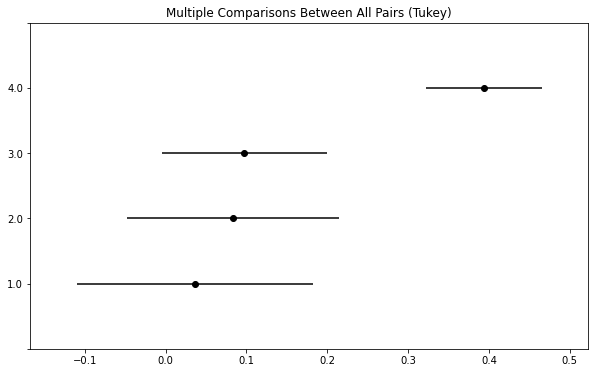

In [87]:
pairwise_tukeyhsd(endog=boston_df['CRIM'],groups=boston_df['RAD']).plot_simultaneous();

### **Both the factors are not significant, therefore, will perform the post-hoc comparisons only for significant factor.**